 # <span style="color:GREEN; font-weight:bold;">Data Preprocessing</span>


In [ ]:
# import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [97]:
# load the dataset
df1=pd.read_csv("/kaggle/input/dataset/Dataset.csv")



In [79]:
# Ensure text column is in string format and handle missing values
df1['TEXT'] = df1['TEXT'].fillna('')  # Fill missing values with empty string
df1['TEXT'] = df1['TEXT'].astype(str)  # Ensure the column is of string type

In [80]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [82]:
df1

,TEXT,LABEL
0,Denial of normal the con be asked to comment o...,1
1,Just by being able to tweet this insufferable ...,1
2,That is retarded You too cute to be single tha...,1
3,Thought of a real badass mongol style declarat...,1
4,Afro American Basho,1
...,...,...
180698,I read the entire Quran and much of the hadith...,1
180699,Retweet I need a woman to do my laundry nonsex...,1
180700,Retweet someone searched FreeBSD code for twit...,0
180701,Mr no one wanted to put Lloyds meat balls in t...,1


In [83]:
# Initialize required tools
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

# Preprocessing function
def preprocess_text(text):
    # 1. Lowercasing
    text = text.lower()

    # 2. Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)

    # 3. Tokenize the text
    tokens = word_tokenize(text)

    # 4. Remove stopwords and apply stemming
    tokens = [ps.stem(word) for word in tokens if word not in stop_words]

    # 5. Join tokens back into a string
    return ' '.join(tokens)

# Apply preprocessing function to the 'text' column
df1['cleaned_text'] = df1['TEXT'].apply(preprocess_text)




In [86]:
df1

,TEXT,LABEL,cleaned_text
0,Denial of normal the con be asked to comment o...,1,denial normal con ask comment tragedi emot retard
1,Just by being able to tweet this insufferable ...,1,abl tweet insuffer bullshit prove trump nazi v...
2,That is retarded You too cute to be single tha...,1,retard cute singl life
3,Thought of a real badass mongol style declarat...,1,thought real badass mongol style declar war at...
4,Afro American Basho,1,afro american basho
...,...,...,...
180698,I read the entire Quran and much of the hadith...,1,read entir quran much hadith know islam muslim...
180699,Retweet I need a woman to do my laundry nonsex...,1,retweet need woman laundri nonsexist truth
180700,Retweet someone searched FreeBSD code for twit...,0,retweet someon search freebsd code twitter nam...
180701,Mr no one wanted to put Lloyds meat balls in t...,1,mr one want put lloyd meat ball mouth poor llo...


In [96]:
df1.describe()

,Label
count,180701.000000
mean,0.444098
std,0.496867
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [88]:
df1.columns

Index(['Text', 'Label'], dtype='object')

In [89]:
df1.shape

(180702, 2)

In [93]:
df1.value_counts('Label')

Label
0.0    100452
1.0     80249
Name: count, dtype: int64

<BarContainer object of 2 artists>

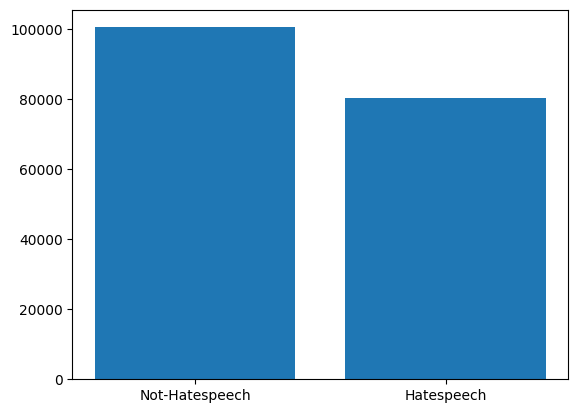

In [94]:
plt.bar(['Not-Hatespeech','Hatespeech'],df1['Label'].value_counts())

<Axes: ylabel='count'>

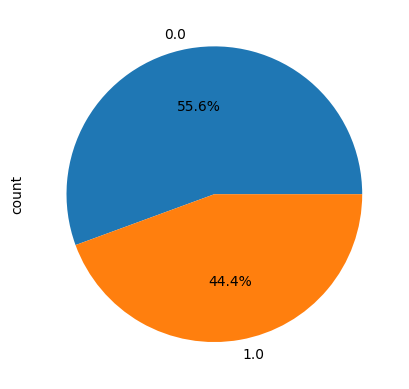

In [95]:
df1['Label'].value_counts().plot(kind='pie',autopct='%1.1f%%')